In [64]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from collections import namedtuple
import matplotlib.patches as patches
import networkx as nx

In [412]:
%run ../modules/utils.ipynb
%run ../modules/cds.ipynb
%run ../modules/preprocessing.ipynb

# Mass Sum -- Phe

(5933, 13)


<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

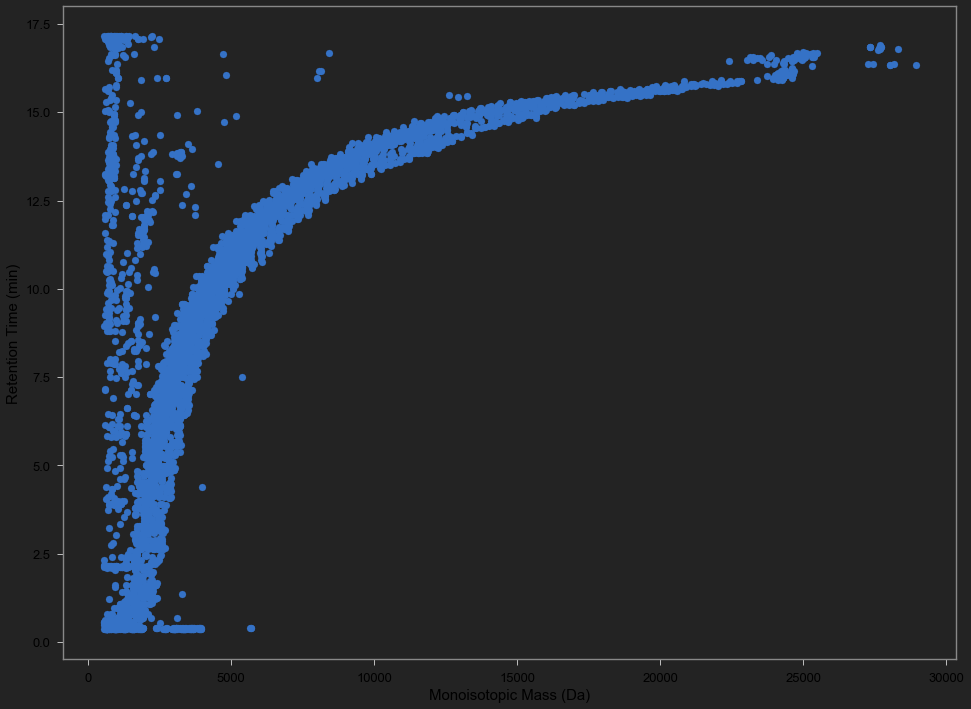

In [3]:
# df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/total_tRNA_acid_degradated_20to40_component_only.xlsx')
# df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/Sigma_tRNA_standard_150pmol_Degradation.xlsx')
# df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/Sigma_tRNA_standard_150pmol_Degradation_all_level.xlsx')
df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724.xlsx')
# df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724_COMBINE2.xlsx')
print(df_phe.shape)
df_phe = thermo_df(df_phe)
plot_zone(df_phe)

In [31]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_sample = df_phe[df_phe.Mass < 25000]
f = zone_selection(df_sample, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, ..., #6371f2,
                   …

points [2, 9, 16, 75, 86, 102, 172, 180, 181, 183, 188, 200, 201, 219, 231, 249, 259, 273, 284, 301, 308, 310, 313, 314, 318, 330, 334, 345, 350, 370, 376, 381, 389, 398, 416, 420, 430, 436, 437, 440, 441, 447, 448, 449, 450, 451, 452, 456, 458, 463, 465, 466, 467, 470, 471, 472, 473, 479, 480, 481, 482, 488, 491, 492, 493, 496, 500, 501, 504, 505, 510, 511, 513, 514, 516, 521, 524, 531, 532, 544, 545, 548, 549, 557, 559, 562, 568, 569, 571, 572, 574, 575, 576, 578, 583, 585, 591, 595, 596, 598, 600, 601, 605, 609, 611, 613, 615, 616, 621, 622, 626, 630, 631, 632, 636, 637, 640, 641, 643, 646, 648, 650, 653, 658, 661, 665, 671, 672, 676, 677, 679, 680, 681, 682, 684, 685, 687, 689, 691, 692, 694, 695, 696, 699, 700, 706, 707, 711, 713, 716, 717, 718, 720, 722, 725, 726, 728, 730, 732, 733, 734, 735, 737, 739, 743, 748, 749, 750, 752, 758, 760, 761, 763, 764, 766, 774, 775, 777, 778, 795, 796, 797, 799, 804, 805, 811, 812, 814, 821, 830, 832, 834, 848, 852, 858, 863, 871, 879, 882, 888,

In [32]:
df_chosen = df_sample.iloc[idxs]
df_chosen.shape

(1608, 3)

In [27]:
df_5p = df_chosen
df_5p.shape

(3483, 3)

In [33]:
df_3p = df_chosen
df_3p.shape

(1608, 3)

In [262]:
df_phe_25k = df_phe[(df_phe.Mass > 23500) & (df_phe.Mass < 25000)]
px.scatter(x=df_phe_25k.Mass, y=df_phe_25k.Vol)

In [359]:
target_full_mass = 24252.311092
df_phe_25k['delta'] = df_phe_25k.Mass - target_full_mass
for idx, row in df_phe_25k.iterrows():
#     print(idx, item)
    comps = components(abs(row.delta))
    if comps.shape[0] > 0:
        print('Mass {:4f} diff {:4f}\n{}'.format(row.Mass, row.delta, comps))

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Mass 24581.380920 diff 329.069828
    A  C  G  U  D  Methyl      Mass
30  1  0  0  0  0       0  0.017328
Mass 24597.353308 diff 345.042216
    A  C  G  U  D  Methyl      Mass
12  0  0  1  0  0       0 -0.005184
Mass 24611.419805 diff 359.108713
    A  C  G  U  D  Methyl      Mass
13  0  0  1  0  0       1  0.061313
Mass 24954.546391 diff 702.235299
     A  C  G  U  D  Methyl      Mass
122  1  0  1  0  0       2  0.135399


In [270]:
components(1657.27)

pre lengh of l 7776
post lengh of l 156
    A  C  G  U  Methyl    Mass
68  1  2  2  0       2  0.0401
81  2  0  1  2       3  0.0670


,A,C,G,U,Methyl,Mass
68,1,2,2,0,2,0.0401
81,2,0,1,2,3,0.0670


In [334]:
df_phe[(df_phe.Mass > 24500) & (df_phe.Mass < 25000)].sort_values('Mass')

,Mass,RT,Vol
5855,24565.335971,16.049153,248708.03
5856,24566.340427,16.089090,733124.61
5857,24581.380920,16.014392,41918736.85
5858,24591.471586,16.435262,4844.66
5859,24592.450278,16.435262,4618.96
5860,24596.356603,16.049153,3689956.25
5861,24597.353308,16.014392,3340775.80
5862,24598.418154,16.257770,8975.59
5863,24605.438673,16.229890,3926.78
5864,24610.422671,15.979698,1098320.58


In [6]:
df_sample = df_phe[df_phe.Mass < 25000]

In [34]:
full_mass = 24252.315242 #24581.374101 
df_3p_cc, df_5p_cc = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)

df3 116 df5 117


In [35]:
full_mass =24252.315242 - 14 #24581.374101 
df_3p_cc_m1m, df_5p_cc_m1m = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)

df3 70 df5 72


In [36]:
full_mass = 24252.315242 - 14*2 #24238.334749 #24252.315242 #24581.374101 
df_3p_cc_m2m, df_5p_cc_m2m = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)

df3 62 df5 61


In [37]:
full_mass = 24252.315242 + 14*2 #24238.334749 #24252.315242 #24581.374101 
df_3p_cc_a2m, df_5p_cc_a2m = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)

df3 100 df5 101


In [307]:
full_mass = 24581.374101 
df_3p_cca, df_5p_cca = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)

df3 100 df5 106


In [39]:
full_mass = 24581.374101 - 14 #24238.334749 #24252.315242 #24581.374101 
df_3p_cca_m1m, df_5p_cca_m1m = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)

df3 51 df5 52


In [40]:
full_mass = 24581.374101 + 14*2 #24238.334749 #24252.315242 #24581.374101 
df_3p_cca_a2m, df_5p_cca_a2m = computational_data_seperation(df_3p, df_5p, full_mass, ignore_endpoints=True)

df3 94 df5 95


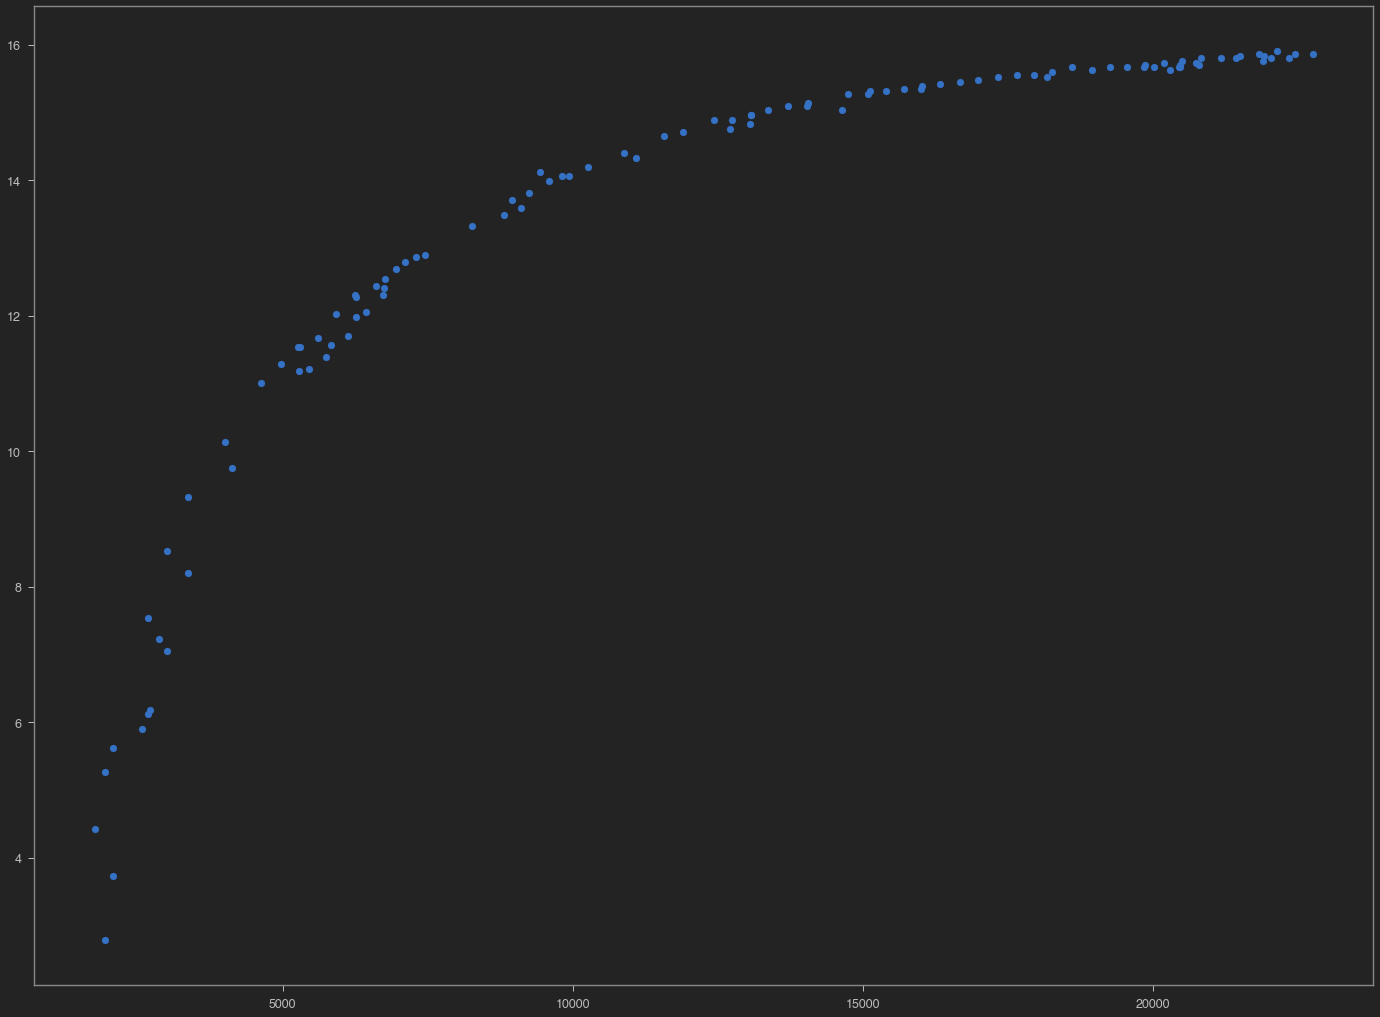

In [368]:
plt.figure(figsize=(24, 18))
# plt.scatter(df_sample.Mass, df_sample.RT)
# plt.scatter(df_3p.Mass, df_3p.RT)
# plt.scatter(df_3p_cc.Mass, df_3p_cc.RT)
# plot_zone(df_3p_cc, trend=True)
# plt.scatter(df_5p_cc.Mass, df_5p_cc.RT)
# plt.scatter(df_3p_cc.Mass, df_3p_cc.RT)
plt.scatter(df_5p_cca.Mass, df_5p_cca.RT)
# plt.scatter(df_3p_cca.Mass, df_3p_cca.RT)
# plt.scatter(df_5p_cca.Mass, df_5p_cca.RT)
# px.scatter(df_3p_cc, x='Mass', y='RT')
# plt.scatter(df_3p_cc_m1m.Mass, df_3p_cc_m1m.RT)
# plt.scatter(df_3p_cc_m1m.Mass, df_3p_cc_m1m.RT)

mass_x (106,) mass_y (106,)
df3_idxs 8 df5_idxs 8
df3_idxs 10 df5_idxs 10
df3_idxs 12 df5_idxs 12
df3_idxs 15 df5_idxs 14
df3_idxs 4 df5_idxs 4
df3_idxs 1 df5_idxs 1
df3_idxs 3 df5_idxs 3
df3_idxs 1 df5_idxs 1
df3_idxs 2 df5_idxs 2


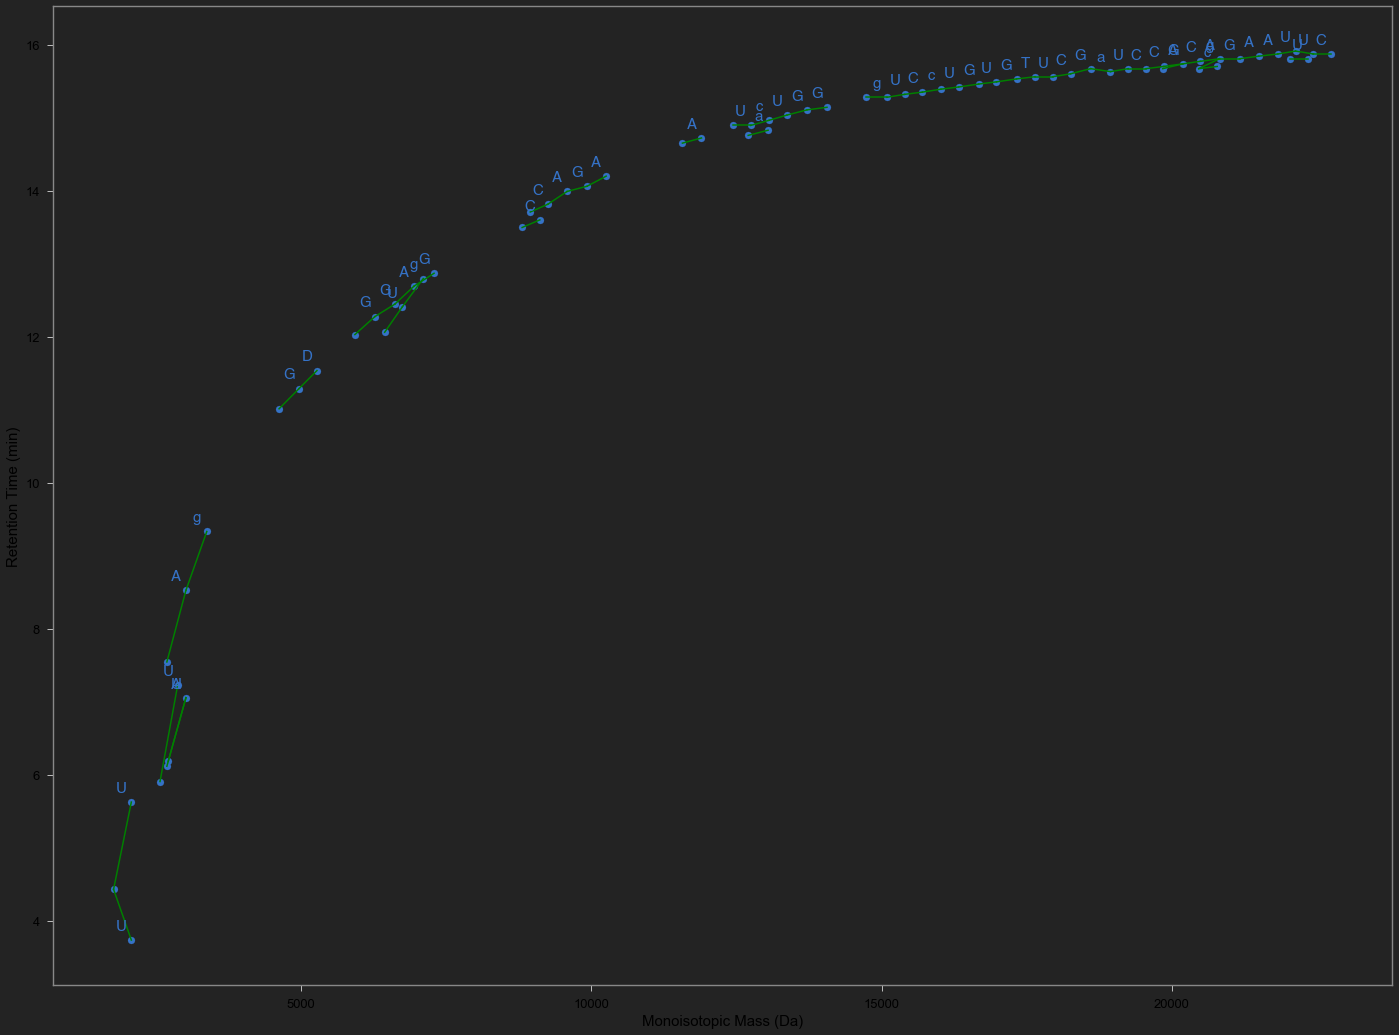

In [314]:
bcr = base_calling_random(df_5p_cca)
plt, _ = plot_basecalling2(*bcr, annotate=False)

In [258]:
df_3p_cc.loc[:,'type'] = 'Reg'
df_3p_cca.loc[:,'type'] = 'Methyl'
df_merge = pd.concat([df_3p_cc, df_3p_cca])
fig = px.scatter(df_merge, x='Mass', y='RT', color='type')
fig.update_layout(
    width=960*1.2,
    height=720*1.2,
    margin=dict(l=0, r=0, t=20, b=0),
    paper_bgcolor="LightSteelBlue",
    showlegend=False
)

#     fig.update_layout(showlegend=False)

/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [315]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
#     print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_zoomin = bcr[0]
f = zone_selection(df_zoomin, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, #6371f2, #6371f2,
               …

In [212]:
plotly_basecalling(*bcr)

In [316]:
idxs = list()
# create our callback function
def on_selection(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

def on_click(trace, points, selector):
    print('points {}'.format(points.point_inds) )
    idxs.extend(points.point_inds)

df_ladder = bcr[0]
f = zone_selection(df_ladder, on_selection=on_selection, on_click=on_click)
f

FigureWidget({
    'data': [{'marker': {'color': [#6371f2, #6371f2, #6371f2, #6371f2, #6371f2,
               …

points [28]
points [29]


In [317]:
df_zoomin = df_ladder.iloc[idxs]
df_zoomin.shape
df_zoomin = df_zoomin.sort_values('Mass')

14.300283755675581 14.545786922495006
(29, 3)


<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_seq/lib/python3.7/site-packages/matplotlib/pyplot.py'>

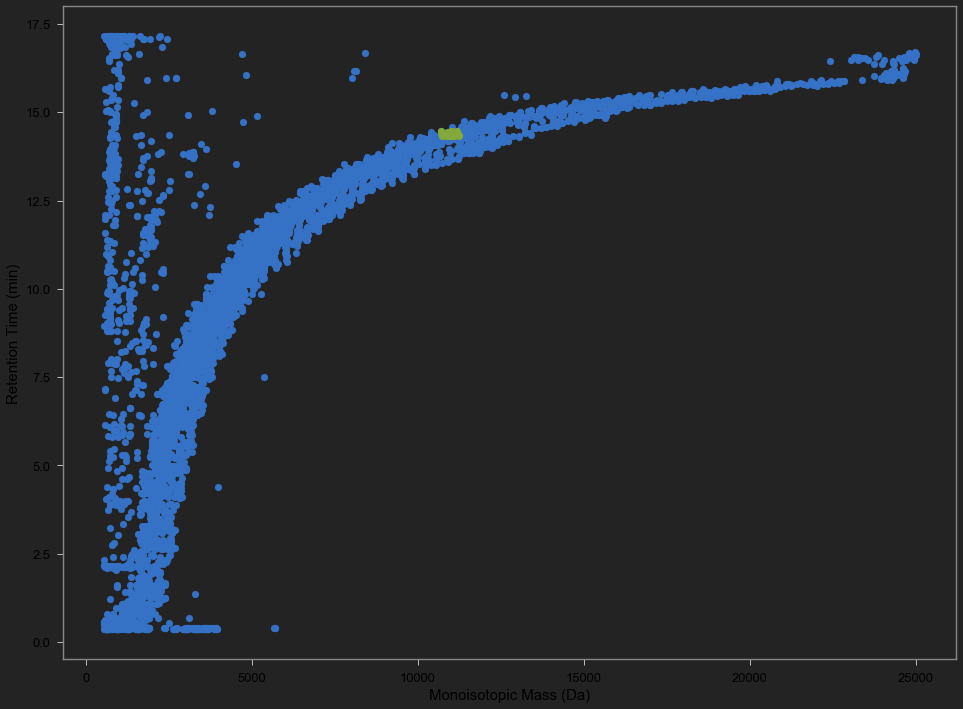

In [328]:
z_zoomin = np.polyfit(df_zoomin.Mass, df_zoomin.RT, 1)
def f_zoomin(x):
    return z_zoomin[0] * x + z_zoomin[1]

df_zoomin = df_zoomin.sort_values('Mass')
l = df_zoomin.iloc[0].Mass + 300
r = df_zoomin.iloc[1].Mass - 300
df_zoomin = df_zoomin.sort_values('RT')
b = f_zoomin(l) 
t = f_zoomin(r)
print(b, t)


df_sample.shape
# df_tmp = df_sample[(df_sample.Mass > l) & (df_sample.Mass < r) & (df_sample.RT > f_zoomin(df_sample.Mass)) & (df_sample.RT < t)]
df_tmp = df_sample[(df_sample.Mass > l) & (df_sample.Mass < r) & (df_sample.RT > b) & (df_sample.RT < t)]
print(df_tmp.shape)
plot_zones(df_sample, df_tmp)

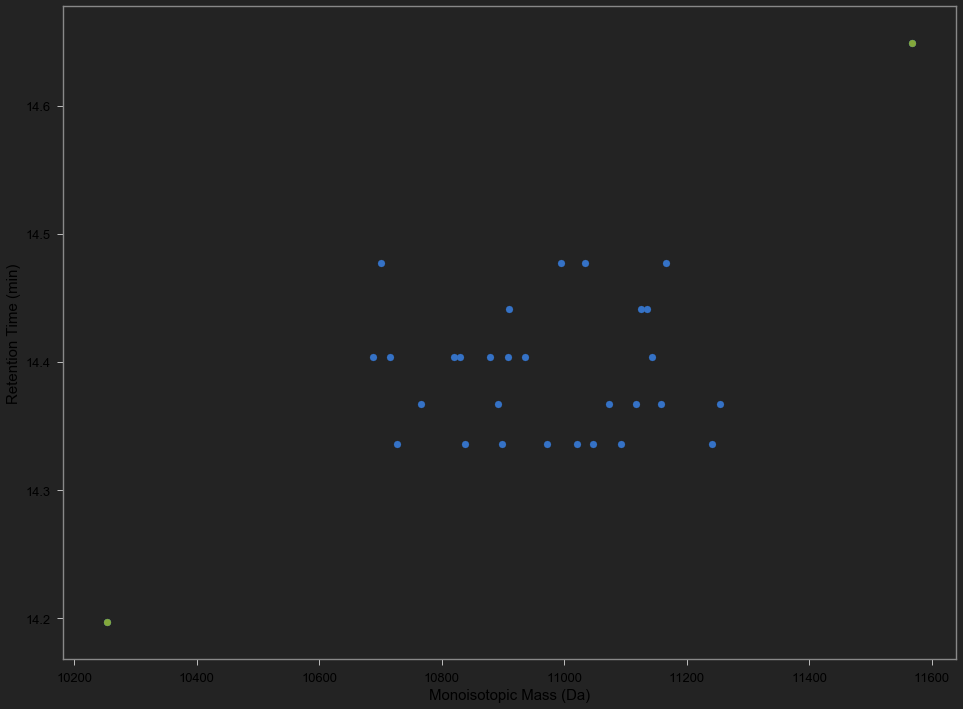

In [329]:
df_focus = pd.concat([df_tmp, df_zoomin])
df_focus.shape
plt = plot_zones(df_focus, df_zoomin)

# plt.plot(df_zoomin.Mass, f_zoomin(df_zoomin.Mass))

In [323]:
bcr_focus = base_calling_random(df_focus)

plotly_basecalling(df_focus, bcr_focus[1])
# plt.scatter(df_focus.Mass, df_focus.RT)
# plt.scatter(df_zoomin.Mass, df_zoomin.RT, color='r')


mass_x (31,) mass_y (31,)
df3_idxs 4 df5_idxs 4
df3_idxs 0 df5_idxs 0
df3_idxs 2 df5_idxs 2
df3_idxs 2 df5_idxs 2
df3_idxs 2 df5_idxs 2
df3_idxs 0 df5_idxs 0
df3_idxs 2 df5_idxs 2
df3_idxs 1 df5_idxs 1
df3_idxs 0 df5_idxs 0


In [366]:
def standalone_dots(df, df_ends):
#     df['Delta'] = df.Mass - df_ends.iloc[1]['Mass']
    idxs = list()
    for idx, row in df.iterrows():
        print('Processing {}'.format(row.Mass))
        delta_left = abs(row.Mass - df_ends.iloc[0]['Mass'])
        delta_right = abs(row.Mass - df_ends.iloc[1]['Mass'])
#         print(delta_left, delta_right)
        df_res_left = components(delta_left)
        df_res_right = components(delta_right)
        if df_res_left.shape[0] > 0:
            print('left')
            print(df_res_left)
        if df_res_right.shape[0] > 0:
            print('right')
            print(df_res_right)
        if df_res_left.shape[0] > 0 and df_res_right.shape[0] > 0:
            print('Mass {} Left Delta {} \n{}\nRight Delta {} \n{}'.format(row.Mass, delta_left, df_res_left, delta_right, df_res_right))
            idxs.append(idx)
    
    print('Got {} items. {}'.format(len(idxs), df.loc[idxs]))
    return df.loc[idxs]

In [367]:
# print(df_tmp, df_zoomin)
standalone_dots(df_tmp, df_zoomin)

Processing 10688.5070783133
Processing 10701.5237531288
Processing 10715.4816099569
Processing 10727.5051102056
Processing 10766.5339551961
Processing 10820.5434271091
Processing 10830.5090382013
Processing 10838.5310777499
Processing 10879.4821999753
left
    A  C  G  U  D  Methyl      Mass
25  0  1  0  1  0       1  0.017558
right
     A  C  G  U  D  Methyl      Mass
121  1  0  1  0  0       1  0.000424
Mass 10879.4821999753 Left Delta 625.0841584976006 
    A  C  G  U  D  Methyl      Mass
25  0  1  0  1  0       1  0.017558
Right Delta 688.1003235797998 
     A  C  G  U  D  Methyl      Mass
121  1  0  1  0  0       1  0.000424
Processing 10892.4539601085
Processing 10898.4444806808
left
   A  C  G  U  D  Methyl      Mass
5  0  0  0  0  2       2 -0.035561
Processing 10907.4754317267
left
    A  C  G  U  D  Methyl     Mass
30  0  0  1  0  1       0 -0.01101
Processing 10909.4519420169
right
     A  C  G  U  D  Methyl      Mass
147  2  0  0  0  0       0  0.025582
Processing 10936.410

,Mass,RT,Vol,Delta
5153,10879.4822,14.40395,5437555.38,-688.100324


# Utils

In [413]:
components(28.1)

Name,A,C,G,U,D,Methyl,Mass,MassDiff
0,0,0,0,0,0,2,28.0312,0.0688


In [56]:
def plot_basecalling2(df, mass_pairs, endpoints=pd.DataFrame(), annotate=True, plt=None):
#     if in_plt:
#         plt = in_plt
#     else:
    if not plt:
        plt = matplotlib.pyplot
    fig = plt.figure(figsize=(24, 18))
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
        
    plt.scatter(df.Mass, df.RT)

    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        plt.plot(df_pair.Mass, df_pair.RT, 'green')
        
        idmax = df_pair['Mass'].idxmax()
        plt.annotate(s=t[2], size=15, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
                     textcoords="offset points", xytext=(-10, 10), ha='center', color='C0')
        
        if not annotate:
            continue
            
        mass = '{:.2f}'.format(df_pair.loc[idmax].Mass)
        plt.annotate(s=mass, size=13, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
                     textcoords="offset points", xytext=(10, -20), ha='center')

    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
#     plt.show()
    return plt, fig

In [311]:
def process_seats(df, mass_pairs, full_mass, col_name, orientation=5):
    seats = int(full_mass // 320)
    df_res = pd.DataFrame()
#     df_res.set_index(range(1, seats+1), inplace=True)
    df_res['position'] = range(1, seats+1)
    df_res[col_name] = ''
    df_res.set_index('position', inplace=True)
    
    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
#         plt.plot(df_pair.Mass, df_pair.RT, 'green')
        
        idmax = df_pair['Mass'].idxmax()
        pos = int(df_pair.loc[idmax].Mass // 320)
        if orientation == 3:
            pos = seats +1 - pos
        base = df_res.loc[pos, col_name] 
        if not base:
            base = t[2]
        else:
            base = '{}, {}'.format(base, t[2])
        df_res.loc[pos, col_name] = base
    
    return df_res
    

In [312]:
df_res = process_seats(*bcr, full_mass, col_name='BaseCCA', orientation=5)
df_res

,BaseCCA
position,
1,
2,
3,
4,
5,
6,"U, U"
7,
8,U
9,"A, A, U"
